In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plotting parameters
colors = ['#377eb8', '#e41a1c', '#ff7f00', '#f781bf', '#4daf4a', '#a65628', '#984ea3', '#999999', '#dede00']
linestyles = [(0, (3, 1, 1, 1, 1, 1)), (0, (1, 1)), '--', (0, (5, 10)), ':', '-.', '-', (0, (1, 3))]

promp_index = 0
bare_index = 1
pemp_index = 2

labels = ['ProMP', 'CNMP', 'PEMP']
num_models = len(labels)

In [3]:
pose_path = "/home/yigit/projects/pemp/sim/nail_poses_"

promp_poses = np.load(f'{pose_path}promp.npy')
cnmp_poses = np.load(f'{pose_path}cnmp.npy')
pemp_poses = np.load(f'{pose_path}pemp.npy')

pose_means = np.array([promp_poses.mean(), cnmp_poses.mean(), pemp_poses.mean()])
pose_stds = np.array([promp_poses.std(), cnmp_poses.std(), pemp_poses.std()])

print(pose_means)
print(pose_stds)


FileNotFoundError: [Errno 2] No such file or directory: '/home/yigit/projects/pemp/sim/nail_poses_promp.npy'

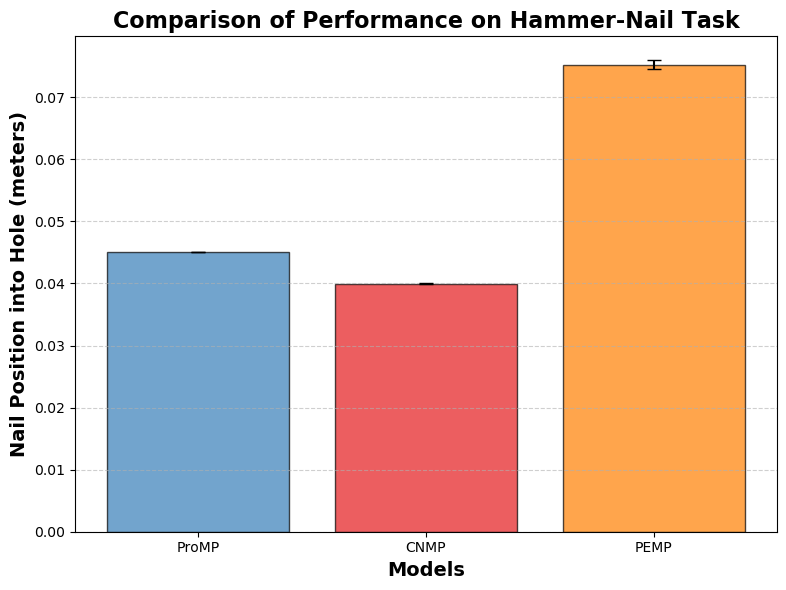

In [12]:
models = ['ProMP', 'CNMP', 'PEMP']
# plt.errorbar(x_labels, pose_means, pose_stds, fmt='o')
# plt.title("Model Errors", fontsize=16, fontweight='bold')
# plt.ylabel("Distance", fontsize=14, fontweight='bold')
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots(figsize=(8, 6))
x_pos = np.arange(len(models))
ax.bar(x_pos, pose_means, yerr=pose_stds, capsize=5, color=[colors[promp_index], colors[bare_index], colors[pemp_index]], alpha=0.7, edgecolor='black')

# Formatting
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Nail Position into Hole (meters)', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Performance on Hammer-Nail Task', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Save the plot (optional)
plt.tight_layout()

In [13]:
# paired t-tests between models
from scipy.stats import ttest_rel

t_stat_promp_cnmp, p_value_promp_cnmp = ttest_rel(promp_poses, cnmp_poses)
t_stat_promp_pemp, p_value_promp_pemp = ttest_rel(promp_poses, pemp_poses)
t_stat_cnmp_pemp, p_value_cnmp_pemp = ttest_rel(cnmp_poses, pemp_poses)

print("T-test results:")
print(f"ProMP vs CNMP: t-statistic = {t_stat_promp_cnmp:.3f}, p-value = {p_value_promp_cnmp:.3f}")
print(f"ProMP vs PEMP: t-statistic = {t_stat_promp_pemp:.3f}, p-value = {p_value_promp_pemp:.3f}")
print(f"CNMP vs PEMP: t-statistic = {t_stat_cnmp_pemp:.3f}, p-value = {p_value_cnmp_pemp:.3f}")

alpha = 0.05
if p_value_promp_cnmp < alpha:
    print("The difference between ProMP and CNMP is statistically significant.")
else:
    print("The difference between ProMP and CNMP is not statistically significant.")

if p_value_promp_pemp < alpha:
    print("The difference between ProMP and PEMP is statistically significant.")
else:
    print("The difference between ProMP and PEMP is not statistically significant.")

if p_value_cnmp_pemp < alpha:
    print("The difference between CNMP and PEMP is statistically significant.")
else:
    print("The difference between CNMP and PEMP is not statistically significant.")

T-test results:
ProMP vs CNMP: t-statistic = 4323.472, p-value = 0.000
ProMP vs PEMP: t-statistic = -276.526, p-value = 0.000
CNMP vs PEMP: t-statistic = -322.576, p-value = 0.000
The difference between ProMP and CNMP is statistically significant.
The difference between ProMP and PEMP is statistically significant.
The difference between CNMP and PEMP is statistically significant.
